# Weighted sum

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nl1=2 #no. of nodes of layer 1
nl2=1 #no. of nodes of layer 2
w=np.array((np.random.rand(nl2,nl1)))
h=np.array((np.random.rand(nl1,1),np.random.rand(nl2,1)))

## bias

In [3]:
b=np.random.rand(nl2,1)
b

array([[0.00171186]])

# Inputs

In [4]:
h[0][0]=5
h[0][1]=2
h[0]

array([[5.],
       [2.]])

# Weighted sum (Feed forward)

In [5]:
cbs=w.dot(h[0])+b[0,0] #with bias
sbs=w.dot(h[0]) #withoout bias
sbs

array([[6.39334428]])

### Sigmoid function

In [6]:
def sigmoid(z):
 sigma=1/(1+np.exp(-z))
 return sigma
 

##  Perceptron Feedforward

In [7]:
h[0][0]=5
h[0][1]=2
bs=sigmoid(w.dot(h[0])+b[0,0]) #with bias
sbs=sigmoid(w.dot(h[0]))#without bias

print('con bias'+str(bs)+'sin bias'+str(sbs))

con bias[[0.99833299]]sin bias[[0.99833014]]


# Cost function

In [8]:
def cost(y,h):
    C=(y-h)**2
    return C

In [9]:
y=.71
Cb=cost(y,bs)
Cbs=cost(y,sbs)
#Cb=(y-bs)**2
#Cbs=(y-sbs)**2
print('costo con bias'+str(Cb)+'costo sin bias'+str(Cbs))

costo con bias[[0.08313591]]costo sin bias[[0.08313427]]


# Backpropagation

## defining the gradient descents derivates

In [10]:
def dC(y,h): #dC/dh
 dcdh=-2*(y-h)
 return dcdh
def dh(z): #dh/dz
 dhdz=sigmoid(z)*(1-sigmoid(z))
 return dhdz
def dz(h): #dz/dw
 dzdw=h
 return dzdw

In [11]:
#Training our perceptron

In [12]:
nl1=2 #nodes in Layer 1
nl2=1 #nodes in Layer 2
etha=.5 #Learning rate 
epoc=100 #number of epochs
#alpha=2
w=np.array((np.random.rand(nl2,nl1)))
w=np.array([[-1,0]])
#w=np.array([[-5,-1]])
#w=np.array([[-2,0]])
h=np.array((np.random.rand(nl1,1),np.random.rand(nl2,1)))
b=np.random.rand(nl2,1) #initialize weights, neurons, and bias matrix
print('pesos iniciales',w)
print('bias inicial',b)
#Determine training matrix 
Dw=np.array(np.random.rand(1,2))
y=np.array(.71) #Determine the "correct answer"
h[0][0]=5 
h[0][1]=2 #Determine inputs
costo=[]
pesos=[]
for e in range(epoc):
 #etha=etha*(np.exp(-alpha*e))   #use it carefully for a variable learning rate
 #z=w.dot(h[0])+b 
 pesos.append(w[0])
 z=w.dot(h[0])
 h[1]=sigmoid(z)#without bias
 C=cost(y,h[1])
 #C=(y-h[1])**2
 Dw=np.transpose(dC(y,h[1])*dh(z)*dz(h[0]))
 Db=dC(y,h[1])*dh(z)
 w=w-(etha*Dw)
 b=b-(etha*Db)
 print('costo',C)
 if C==0:
    print('break in epoch',e)
    break
 costo.append(C[0])
# pesos.append(w[0])

pesos iniciales [[-1  0]]
bias inicial [[0.66334274]]
costo [[0.49464095]]
costo [[0.49328524]]
costo [[0.49150248]]
costo [[0.48906477]]
costo [[0.48555648]]
costo [[0.4801434]]
costo [[0.47092083]]
costo [[0.45267692]]
costo [[0.40695236]]
costo [[0.24886065]]
costo [[0.00149565]]
costo [[9.42369836e-06]]
costo [[5.42867989e-07]]
costo [[2.79448693e-08]]
costo [[1.47866854e-09]]
costo [[7.77569305e-11]]
costo [[4.0947676e-12]]
costo [[2.155643e-13]]
costo [[1.1348988e-14]]
costo [[5.97489018e-16]]
costo [[3.14560692e-17]]
costo [[1.65606968e-18]]
costo [[8.71872102e-20]]
costo [[4.59015653e-21]]
costo [[2.41661134e-22]]
costo [[1.27237427e-23]]
costo [[6.70052647e-25]]
costo [[3.52875232e-26]]
costo [[1.85559806e-27]]
costo [[9.7633863e-29]]
costo [[5.43574468e-30]]
costo [[3.08148791e-31]]
costo [[1.23259516e-32]]
costo [[0.]]
break in epoch 33


In [13]:
costo

[array([0.49464095]),
 array([0.49328524]),
 array([0.49150248]),
 array([0.48906477]),
 array([0.48555648]),
 array([0.4801434]),
 array([0.47092083]),
 array([0.45267692]),
 array([0.40695236]),
 array([0.24886065]),
 array([0.00149565]),
 array([9.42369836e-06]),
 array([5.42867989e-07]),
 array([2.79448693e-08]),
 array([1.47866854e-09]),
 array([7.77569305e-11]),
 array([4.0947676e-12]),
 array([2.155643e-13]),
 array([1.1348988e-14]),
 array([5.97489018e-16]),
 array([3.14560692e-17]),
 array([1.65606968e-18]),
 array([8.71872102e-20]),
 array([4.59015653e-21]),
 array([2.41661134e-22]),
 array([1.27237427e-23]),
 array([6.70052647e-25]),
 array([3.52875232e-26]),
 array([1.85559806e-27]),
 array([9.7633863e-29]),
 array([5.43574468e-30]),
 array([3.08148791e-31]),
 array([1.23259516e-32])]

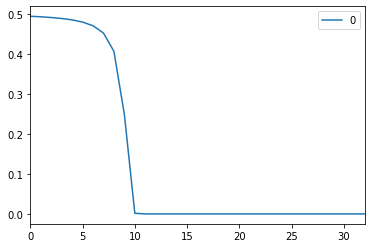

In [14]:
costo1=pd.DataFrame(costo)
costo1.plot()

# Implementation

In [15]:
w #perfect weight with bias [[0.15726836,0.08703549]] perfect weights without bias [[0.09533541,0.20935351]]

array([[0.01644553, 0.40657821]])

In [16]:
h[0][0]=5
h[0][1]=2
bs=sigmoid(w.dot(h[0])+b[0,0]) #con bias
sbs=sigmoid(w.dot(h[0]))#sin bias
sbs

array([[0.71]])

In [17]:
pesos1=pd.DataFrame(pesos)
pesos1[1]

0     0.000000
1     0.009351
2     0.020025
3     0.032431
4     0.047193
5     0.065321
6     0.088582
7     0.120421
8     0.168601
9     0.253927
10    0.420107
11    0.405553
12    0.406825
13    0.406522
14    0.406591
15    0.406575
16    0.406579
17    0.406578
18    0.406578
19    0.406578
20    0.406578
21    0.406578
22    0.406578
23    0.406578
24    0.406578
25    0.406578
26    0.406578
27    0.406578
28    0.406578
29    0.406578
30    0.406578
31    0.406578
32    0.406578
33    0.406578
Name: 1, dtype: float64

# Using Keras

In [18]:
import tensorflow as tf #1st part
from tensorflow  import keras 
from tensorflow.keras import layers
import numpy as np

In [19]:
x_train=np.array([[5,2]])
y_train=np.array([[.71]])

In [20]:
#initial_weights=np.array([[-2],[0]]) #this doesn´t work
initial_weights=np.array([[-1],[0]]) #this works
model=keras.Sequential()
model.add(keras.Input(shape=2))
model.add(layers.Dense(1,activation='sigmoid',use_bias=False))
model.set_weights([initial_weights])
print(model.get_weights())
#After we finished to construct the model we have to "compile" it
weight=model.compile(loss="MSE",optimizer=keras.optimizers.SGD(lr=etha),metrics=['accuracy'],)
#And then it´s time to train our model 
history=model.fit(x_train,y_train,epochs=epoc)
#model.evaluate(x_test,y_test,verbose=1)
model.summary()
print(len(model.weights))
print(model.weights)

[array([[-1.],
       [ 0.]], dtype=float32)]
Train on 1 samples
Epoch 1/100
1/1 [==============================] - 0s 338ms/sample - loss: 0.4946 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 4ms/sample - loss: 0.4933 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 4ms/sample - loss: 0.4915 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.4891 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 4ms/sample - loss: 0.4856 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.4801 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 4ms/sample - loss: 0.4709 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 5ms/sample - loss: 0.4527 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.4070 - accuracy: 0.0000e+00
Epoch 

Epoch 77/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 78/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 79/100
1/1 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 80/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 81/100
1/1 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 82/100
1/1 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 83/100
1/1 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 84/100
1/1 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 85/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 86/100
1/1 [==========

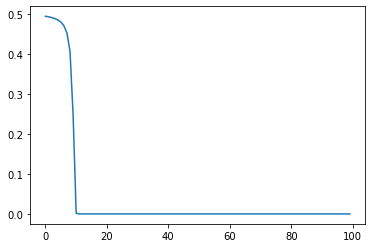

In [21]:
plt.plot(history.history['loss'])

In [22]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.01644553],
        [0.4065782 ]], dtype=float32)>]

In [23]:
w

array([[0.01644553, 0.40657821]])

In [24]:
model.predict(x_train)

array([[0.71]], dtype=float32)

# Weight valley system  visualization

In [25]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [26]:
def z(w1,w2,y):
 return (y-(sigmoid(w1*h[0][0]+w2*h[0][1])))**2
y=.71
def f(height,azimuth):
 fig= plt.figure()
 ax =Axes3D(fig)
 w1=np.linspace(-1,1,100)
 w2=np.linspace(-1,1,100)
 w1, w2 =np.meshgrid(w1,w2)
 ax.plot_surface(w1, w2, z(w1,w2,y),cmap='cividis')
 ax.scatter3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1],y),c='r')
 ax.plot3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1],y),c='r')
 ax.set_xlabel('w1')
 ax.set_ylabel('w2')
 ax.set_zlabel('c')
 ax.view_init(height,azimuth)

In [27]:
def f(height,azimuth):
 fig= plt.figure()
 ax =Axes3D(fig)
 w1=np.linspace(pesos1[0][0],pesos1[0][len(pesos1)-1],100)
 w2=np.linspace(pesos1[1][0],pesos1[1][len(pesos1)-1],100)
 w1, w2 =np.meshgrid(w1,w2)
 ax.plot_surface(w1, w2, z(w1,w2,y),cmap='cividis')
 ax.scatter3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1],y),c='r')
 ax.plot3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1],y),c='r')
 ax.set_xlabel('w1')
 ax.set_ylabel('w2')
 ax.set_zlabel('c')
 ax.view_init(height,azimuth)
 plt.show()
    #plt.figure(2)
    #x = np.linspace(-10, 10, num=1000)
    #plt.plot(x, m * x + b)
    #plt.ylim(-5, 5)
    #plt.show()

interactive_plot = interactive(f, height=(-90, 90,5), azimuth=(-0, 160, 5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot
#Usually can be seen nice with height=20 and azimuth=80

interactive(children=(IntSlider(value=0, description='height', max=90, min=-90, step=5), IntSlider(value=80, d…

In [28]:

def f(altura,azimuth,rang1,rang2):
 fig= plt.figure()
 ax =Axes3D(fig)
 w1=np.linspace(rang1,rang2,30)
 w2=np.linspace(rang1,rang2,30)
 w1, w2 =np.meshgrid(w1,w2)
 ax.scatter3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1],y),c='r')
 ax.plot3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1],y),c='r')
 ax.plot_wireframe(w1, w2, z(w1,w2,y),cmap='cividis')
 ax.set_xlabel('w1')
 ax.set_ylabel('w2')
 ax.set_zlabel('c')
 ax.view_init(altura,azimuth)
 plt.show()
    #plt.figure(2)
    #x = np.linspace(-10, 10, num=1000)
    #plt.plot(x, m * x + b)
    #plt.ylim(-5, 5)
    #plt.show()

interactive_plot = interactive(f, altura=(0, 90,10), azimuth=(0, 120, 5),rang1=(-10,0,.1),rang2=(0,10,.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot
#w1=np.linspace(pesos1[0][0],pesos1[0][len(pesos1)-1],100)
#w2=np.linspace(pesos1[1][0],pesos1[1][len(pesos1)-1],100)

interactive(children=(IntSlider(value=40, description='altura', max=90, step=10), IntSlider(value=60, descript…

# operador  XOR

In [29]:
def importa(archivo,nombres):
 data = pd.read_csv(archivo,sep=',',names=nombres,skiprows=1)#para archivo simple
 return data

In [30]:
def predict(h,w,b):
      z=w.dot(h[0])+b
      h[1]=sigmoid(z)
      return(h[1])

In [33]:
def entrada(h,data,i):
      h[0][0]=data.I1[i] 
      h[0][1]=data.I2[i]
      return h[0]

In [34]:
archivo='XOR.csv'
nombres=(['I1','I2','XOR'])
data=importa(archivo, nombres)
data

,I1,I2,XOR
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


In [35]:
nl1=2 #nodes in Layer 1
nl2=1 #nodes in Layer 2
etha=.1 #Learning rate 
epoc=3000 #number of epochs
#alpha=2
w=np.array((np.random.rand(nl2,nl1)))
h=np.array((np.random.rand(nl1,1),np.random.rand(nl2,1)))
b=np.random.rand(nl2,1) #initialize weights, neurons, and bias matrix
print('pesos iniciales',w)
print('bias inicial',b)
#Determine training matrix 
#Dw=np.array(np.random.rand(1,2))
y=np.array([[data['XOR']]])
C=cost(y,h[1])
costo=[]
pesos=[]
C=np.mean(cost(y,h[1]))
for e in range(epoc):
    print('costo',C/4)
    costo.append(np.mean(C/4))#/4)
    C=0
    for i in data.index :
        y=np.array([[data['XOR'].iloc[i]]])
        h[0]=entrada(h,data,i)
        pesos.append(w[0])
        z=w.dot(h[0])+b
        h[1]=sigmoid(z)#without bias
        C=C+cost(y,h[1])
        Dw=np.transpose(dC(y,h[1])*dh(z)*dz(h[0]))
        Db=dC(y,h[1])*dh(z)
        w=w-(etha*Dw)
        b=b-(etha*Db)
        if C==0:
           print('break in epoch',e)
           break
# pesos.append(w[0])

pesos iniciales [[0.71853062 0.64700131]]
bias inicial [[0.94031764]]
costo 0.1165727499634848
costo [[0.34987012]]
costo [[0.34636989]]
costo [[0.34283238]]
costo [[0.33926539]]
costo [[0.33567748]]
costo [[0.33207799]]
costo [[0.32847694]]
costo [[0.32488501]]
costo [[0.32131341]]
costo [[0.31777375]]
costo [[0.31427792]]
costo [[0.31083793]]
costo [[0.30746571]]
costo [[0.30417291]]
costo [[0.30097073]]
costo [[0.29786971]]
costo [[0.29487951]]
costo [[0.29200875]]
costo [[0.28926488]]
costo [[0.28665399]]
costo [[0.28418076]]
costo [[0.28184842]]
costo [[0.27965867]]
costo [[0.2776118]]
costo [[0.27570668]]
costo [[0.27394089]]
costo [[0.27231085]]
costo [[0.27081198]]
costo [[0.26943884]]
costo [[0.26818532]]
costo [[0.2670448]]
costo [[0.26601034]]
costo [[0.26507478]]
costo [[0.26423093]]
costo [[0.26347165]]
costo [[0.26279]]
costo [[0.26217923]]
costo [[0.26163294]]
costo [[0.26114508]]
costo [[0.26070996]]
costo [[0.26032229]]
costo [[0.25997721]]
costo [[0.25967024]]
costo [

costo [[0.25637862]]
costo [[0.25637853]]
costo [[0.25637844]]
costo [[0.25637836]]
costo [[0.25637827]]
costo [[0.25637818]]
costo [[0.2563781]]
costo [[0.25637801]]
costo [[0.25637793]]
costo [[0.25637784]]
costo [[0.25637776]]
costo [[0.25637768]]
costo [[0.2563776]]
costo [[0.25637752]]
costo [[0.25637744]]
costo [[0.25637736]]
costo [[0.25637728]]
costo [[0.2563772]]
costo [[0.25637712]]
costo [[0.25637705]]
costo [[0.25637697]]
costo [[0.2563769]]
costo [[0.25637682]]
costo [[0.25637675]]
costo [[0.25637667]]
costo [[0.2563766]]
costo [[0.25637653]]
costo [[0.25637646]]
costo [[0.25637639]]
costo [[0.25637632]]
costo [[0.25637625]]
costo [[0.25637618]]
costo [[0.25637611]]
costo [[0.25637604]]
costo [[0.25637598]]
costo [[0.25637591]]
costo [[0.25637584]]
costo [[0.25637578]]
costo [[0.25637571]]
costo [[0.25637565]]
costo [[0.25637558]]
costo [[0.25637552]]
costo [[0.25637546]]
costo [[0.2563754]]
costo [[0.25637533]]
costo [[0.25637527]]
costo [[0.25637521]]
costo [[0.25637515]

costo [[0.25636825]]
costo [[0.25636825]]
costo [[0.25636825]]
costo [[0.25636824]]
costo [[0.25636824]]
costo [[0.25636824]]
costo [[0.25636823]]
costo [[0.25636823]]
costo [[0.25636823]]
costo [[0.25636822]]
costo [[0.25636822]]
costo [[0.25636822]]
costo [[0.25636821]]
costo [[0.25636821]]
costo [[0.25636821]]
costo [[0.2563682]]
costo [[0.2563682]]
costo [[0.2563682]]
costo [[0.25636819]]
costo [[0.25636819]]
costo [[0.25636819]]
costo [[0.25636818]]
costo [[0.25636818]]
costo [[0.25636818]]
costo [[0.25636818]]
costo [[0.25636817]]
costo [[0.25636817]]
costo [[0.25636817]]
costo [[0.25636816]]
costo [[0.25636816]]
costo [[0.25636816]]
costo [[0.25636815]]
costo [[0.25636815]]
costo [[0.25636815]]
costo [[0.25636815]]
costo [[0.25636814]]
costo [[0.25636814]]
costo [[0.25636814]]
costo [[0.25636814]]
costo [[0.25636813]]
costo [[0.25636813]]
costo [[0.25636813]]
costo [[0.25636812]]
costo [[0.25636812]]
costo [[0.25636812]]
costo [[0.25636812]]
costo [[0.25636811]]
costo [[0.256368

costo [[0.2563678]]
costo [[0.2563678]]
costo [[0.2563678]]
costo [[0.2563678]]
costo [[0.2563678]]
costo [[0.2563678]]
costo [[0.2563678]]
costo [[0.2563678]]
costo [[0.2563678]]
costo [[0.2563678]]
costo [[0.2563678]]
costo [[0.2563678]]
costo [[0.2563678]]
costo [[0.2563678]]
costo [[0.2563678]]
costo [[0.2563678]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[

costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.256

costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.256

costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.256

costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]
costo [[0.25636779]]


In [36]:
w

array([[2.53123326e-02, 1.76260430e-11]])

In [37]:
b

array([[-2.07711834e-11]])

In [38]:
for i in data.index:
  print('input:',entrada(h,data,i))
  print('output:',predict(h,w,b))

input: [[1.]
 [1.]]
output: [[0.50632775]]
input: [[1.]
 [0.]]
output: [[0.50632775]]
input: [[0.]
 [1.]]
output: [[0.5]]
input: [[0.]
 [0.]]
output: [[0.5]]


In [ ]:
costo

In [ ]:
costo2=pd.DataFrame(costo)
#pd.DataFrame(costo)
costo2.plot()

In [ ]:
Dw

In [ ]:
Db